# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Raihan Ahmad Abiyyu
- **Email:** biyyusinatra@gmail.com
- **ID Dicoding:** MC327D5Y2198

## Menentukan Pertanyaan Bisnis

**1. Bagaimana pola pembelian pelanggan berdasarkan RFM Analysis?**
- Siapa pelanggan dengan nilai transaksi tertinggi dan bagaimana karakteristik mereka?  
- Berapa persen pelanggan yang hanya melakukan satu kali pembelian (*one-time buyers*)?  
- Bagaimana strategi pemasaran yang sesuai untuk tiap segmen pelanggan berdasarkan hasil RFM?  

**2. Bagaimana distribusi geografis pesanan dan pengiriman?**  
- Kota atau wilayah mana yang memiliki volume transaksi tertinggi?  
- Wilayah mana yang mengalami waktu pengiriman paling lama atau sering mengalami keterlambatan?  
- Bagaimana hubungan antara jarak pengiriman dengan waktu pengiriman?  

**3. Bagaimana performa dan profitabilitas kategori produk?**
- Kategori produk apa yang memiliki penjualan tertinggi dan margin keuntungan terbaik?  
- Bagaimana pola permintaan untuk setiap kategori produk sepanjang tahun?  
- Apakah ada korelasi antara harga produk dan jumlah unit terjual dalam setiap kategori?  

## Import Semua Packages/Library yang Digunakan

In [5]:
# Libraries untuk manipulasi data
import pandas as pd
import numpy as np

# Libraries untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Libraries untuk analisis waktu
from datetime import datetime

# Library untuk analisis geografis
import geopandas as gpd
import folium
from folium.plugins import HeatMap


## Data Wrangling

### Gathering Data

#### 1. Load dataset

In [6]:
customers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
category_translation = pd.read_csv("product_category_name_translation.csv")

#### 2. Melihat beberapa baris pertama dari setiap dataset untuk memahami isinya.

In [7]:
datasets = {
    "customers": customers, "geolocation": geolocation, "order_items": order_items,
    "payments": payments, "reviews": reviews, "orders": orders, "products": products,
    "sellers": sellers, "category_translation": category_translation
}

for name, df in datasets.items():
    print(f"Dataset: {name}")
    display(df.head(3))
    print("\n")

Dataset: customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP




Dataset: geolocation


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP




Dataset: order_items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87




Dataset: payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71




Dataset: reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24




Dataset: orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00




Dataset: products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0




Dataset: sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ




Dataset: category_translation


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


#### 3. Menampilkan informasi umum tentang kolom dan tipe data dalam setiap dataset

In [8]:
for name, df in datasets.items():
    print(f"Dataset: {name}")
    print(df.info(), "\n")

Dataset: customers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None 

Dataset: geolocation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   

#### 4. Memeriksa jumlah baris dan kolom di setiap dataset

In [9]:
for name, df in datasets.items():
    print(f"{name}: {df.shape}")

customers: (99441, 5)
geolocation: (1000163, 5)
order_items: (112650, 7)
payments: (103886, 5)
reviews: (99224, 7)
orders: (99441, 8)
products: (32951, 9)
sellers: (3095, 4)
category_translation: (71, 2)


#### **Insight:**
- Dataset terdiri dari beberapa file yang saling terkait melalui ID, misalnya customer_id, order_id, product_id, seller_id, oder_item_id.
- Semua date/tanggal masih berformat object, nanti akan diganti menjadi format tanggal untuk analisis deret waktu.

### Assessing Data

#### 1. Memeriksa missing values

In [10]:
for name, df in datasets.items():
    print(f"Missing values in {name}:")
    print(df.isnull().sum(), "\n")

Missing values in customers:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

Missing values in geolocation:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 

Missing values in order_items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

Missing values in payments:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 

Missing values in reviews:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_cr

#### 2. Memeriksa data duplikat

In [11]:
for name, df in datasets.items():
    print(f"{name}: {df.duplicated().sum()} duplicate rows")

customers: 0 duplicate rows
geolocation: 261831 duplicate rows
order_items: 0 duplicate rows
payments: 0 duplicate rows
reviews: 0 duplicate rows
orders: 0 duplicate rows
products: 0 duplicate rows
sellers: 0 duplicate rows
category_translation: 0 duplicate rows


#### 3. Memeriksa Konsistensi Data

In [12]:
print(f"Jumlah unique customer_id: {customers['customer_id'].nunique()}")
print(f"Jumlah unique order_id: {orders['order_id'].nunique()}")

Jumlah unique customer_id: 99441
Jumlah unique order_id: 99441


In [13]:
missing_orders = orders[~orders["order_id"].isin(order_items["order_id"])]
print(f"Jumlah order yang tidak memiliki order items: {missing_orders.shape[0]}")


Jumlah order yang tidak memiliki order items: 775


In [14]:
print("Distribusi status pesanan:")
print(orders["order_status"].value_counts())

Distribusi status pesanan:
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [15]:
print(f"Nilai minimum harga produk: {order_items['price'].min()}")
print(f"Nilai maksimum harga produk: {order_items['price'].max()}")

Nilai minimum harga produk: 0.85
Nilai maksimum harga produk: 6735.0


#### **Insight:**
**Missing Values:**
- Dataset pelanggan dan penjual bersih tanpa nilai yang hilang.
- Dataset geolokasi juga tidak memiliki nilai yang hilang.
- **Sebanyak 87.656 review tidak memiliki judul komentar, dan 58.247 review tidak memiliki isi komentar.** Mayoritas pelanggan memberikan rating tanpa menuliskan ulasan.
- **160 order tidak memiliki tanggal persetujuan pembayaran,**  Kemungkinan ini terjadi pada pesanan yang dibatalkan atau tidak diproses lebih lanjut.
- **1.783 order tidak memiliki tanggal pengiriman ke kurir,** Bisa terjadi karena pesanan dibatalkan atau belum dikirim oleh penjual.
- **2.965 order tidak memiliki tanggal diterima pelanggan,** Bisa jadi pesanan belum sampai, hilang dalam pengiriman, atau status tidak diperbarui dalam sistem.
- **610 produk tidak memiliki kategori, nama, deskripsi, dan foto.**
- **2 produk tidak memiliki informasi dimensi dan berat.**
- Dataset pembayaran dan order item tidak memiliki data yang hilang.


**Data Duplikat:**
- Dataset pelanggan, order_items, payments, reviews, orders, products, sellers, dan category_translation tidak memiliki data duplikat.
- **Dataset geolokasi memiliki 261.831 baris duplikat.**

**Lainnya:**
- **Jumlah unique customer_id dan order_id sama**
- **Sebanyak 775 order tidak memiliki order items,** yang mungkin menunjukkan pesanan yang dibatalkan, gagal diproses, atau terjadi kesalahan dalam pencatatan data.
- **Mayoritas pesanan (96,478) berstatus "delivered",** menunjukkan bahwa sebagian besar transaksi berhasil diselesaikan.
- **Sebanyak 1,107 pesanan masih dalam status "shipped",** yang berarti dalam proses pengiriman tetapi belum diterima pelanggan.
- **1,234 pesanan (canceled + unavailable) tidak berhasil diproses,** yang bisa terjadi karena pembatalan oleh pelanggan, stok habis, atau masalah lainnya.
- **Pesanan dengan status "invoiced" (314) dan "processing" (301)** menunjukkan transaksi yang masih dalam tahap awal, kemungkinan menunggu pengiriman.
- **Status "created" (5) dan "approved" (2) sangat sedikit,** yang bisa berarti pesanan dibuat tetapi belum diproses lebih lanjut.
- **Harga produk bervariasi dari 0.85 hingga 6,735,** menunjukkan adanya rentang harga yang sangat luas dalam katalog produk.

### Cleaning Data

#### 1. Menangani Missing Values

Menghapus pesanan tanpa item

In [16]:
orders = orders[orders["order_id"].isin(order_items["order_id"])]

Mengisi missing values pada tanggal dengan estimasi rata-rata

In [17]:
orders["order_delivered_customer_date"].fillna(orders["order_estimated_delivery_date"], inplace=True)

<ipython-input-17-93d5a3a38525>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders["order_delivered_customer_date"].fillna(orders["order_estimated_delivery_date"], inplace=True)
<ipython-input-17-93d5a3a38525>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders["order_delivered_customer_date"].fillna(orders["order_estimated_delivery_d

Menghapus pesanan yang belum diselesaikan

In [18]:
orders = orders[orders["order_status"] == "delivered"]

#### 2. Menyesuaikan format data

Konversi kolom tanggal dari format object ke format datetime

In [19]:
date_columns = [
    "order_purchase_timestamp", "order_approved_at",
    "order_delivered_carrier_date", "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for col in date_columns:
    orders[col] = pd.to_datetime(orders[col])

Menggabungkan dataset kategori produk dengan terjemahannya

In [20]:
products = products.merge(category_translation, on="product_category_name", how="left")

#### 3. Menyimpan Data yang telah dibersihkan

In [21]:
orders.to_csv("cleaned_orders.csv", index=False)
products.to_csv("cleaned_products.csv", index=False)
customers.to_csv("cleaned_customers.csv", index=False)
order_items.to_csv("cleaned_order_items.csv", index=False)

**Insight:**
- Menghapus 775 pesanan tanpa item memastikan hanya pesanan valid yang dianalisis.
- Mengisi tanggal pengiriman yang hilang dengan estimasi rata-rata membantu menghindari missing values.
- Menghapus pesanan yang belum selesai ("delivered" saja) membuat analisis lebih fokus pada transaksi yang benar-benar terjadi.
- Konversi kolom tanggal ke format datetime.
- Menggabungkan kategori produk dengan terjemahannya membantu untuk memahami produk.

## Exploratory Data Analysis (EDA)

### Analisis Statistik Deskriptif

In [22]:
# Menampilkan statistik deskriptif setiap dataset
datasets = [customers, geolocation, order_items, payments, reviews, orders, products, sellers]
dataset_names = ["customers", "geolocation", "order_items", "payments", "reviews", "orders", "products", "sellers"]

for i, dataset in enumerate(datasets):
    print(f"Dataset: {dataset_names[i]}")
    print(dataset.describe(include="all"))
    print("-" * 50)


Dataset: customers
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_ci

Melihat jumlah nilai unik dan missing values

In [23]:
for i, dataset in enumerate(datasets):
    print(f"Dataset: {dataset_names[i]}")
    print(dataset.nunique())
    print("Missing Values:")
    print(dataset.isnull().sum())
    print("-" * 50)

Dataset: customers
customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64
Missing Values:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
--------------------------------------------------
Dataset: geolocation
geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64
Missing Values:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
--------------------------------------------------
Dataset: order_items
order_id               98666
order_item_id             21
product_id          

#### 2. Analisis Pola Waktu Pembelian Pelanggan

Melihat tren jumlah pesanan berdasarkan bulan

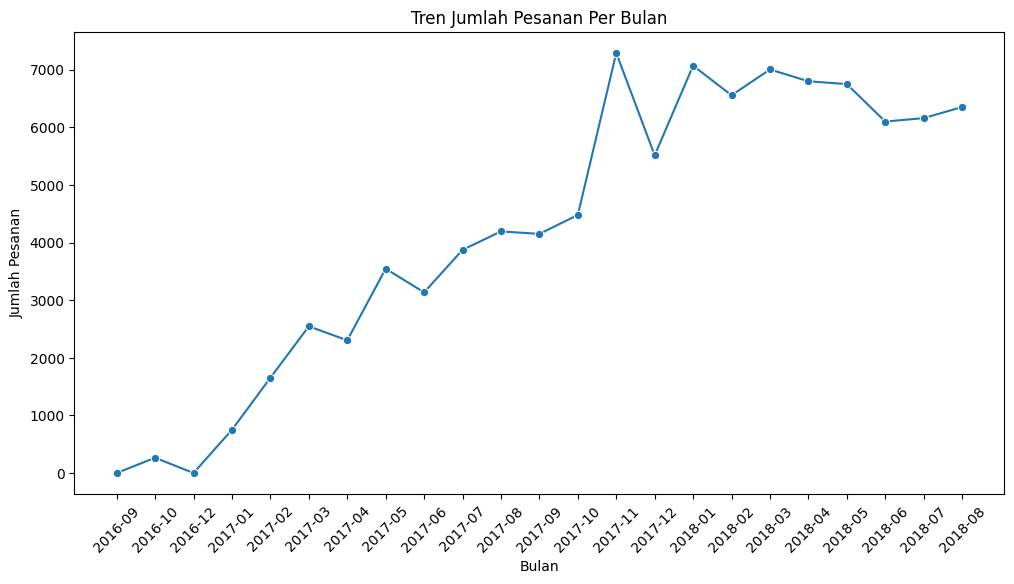

In [24]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["order_month"] = orders["order_purchase_timestamp"].dt.to_period("M")
monthly_orders = orders.groupby("order_month")["order_id"].count()

plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_orders.index.astype(str), y=monthly_orders.values, marker="o")
plt.title("Tren Jumlah Pesanan Per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)
plt.show()

Melihat pola pembelian per hari dalam seminggu

<ipython-input-25-739f11436b58>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, palette="coolwarm")


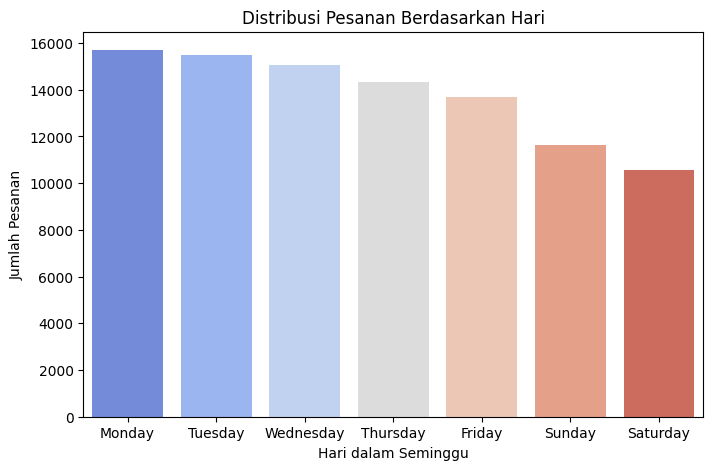

In [25]:
orders["order_day_of_week"] = orders["order_purchase_timestamp"].dt.day_name()
day_of_week_counts = orders["order_day_of_week"].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, palette="coolwarm")
plt.title("Distribusi Pesanan Berdasarkan Hari")
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Jumlah Pesanan")
plt.show()

#### 3. Analisis Nilai Transaksi dan Pembayaran

Distribusi jumlah transaksi (Order payment value)

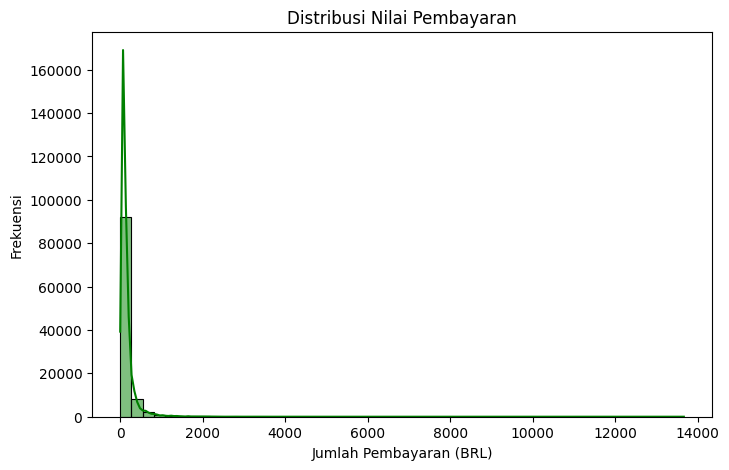

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(payments["payment_value"], bins=50, kde=True, color="green")
plt.title("Distribusi Nilai Pembayaran")
plt.xlabel("Jumlah Pembayaran (BRL)")
plt.ylabel("Frekuensi")
plt.show()

<ipython-input-27-747cb2d7bb37>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_types.index, y=payment_types.values, palette="viridis")


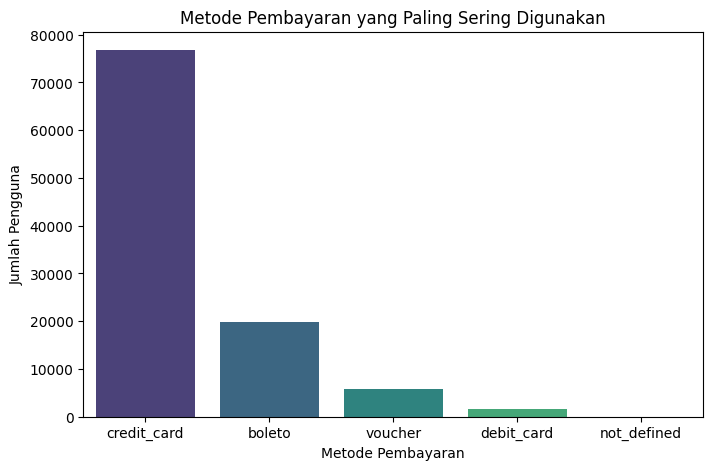

In [27]:
payment_types = payments["payment_type"].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=payment_types.index, y=payment_types.values, palette="viridis")
plt.title("Metode Pembayaran yang Paling Sering Digunakan")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Pengguna")
plt.show()

#### Analisis Produk dan Kategori Produk

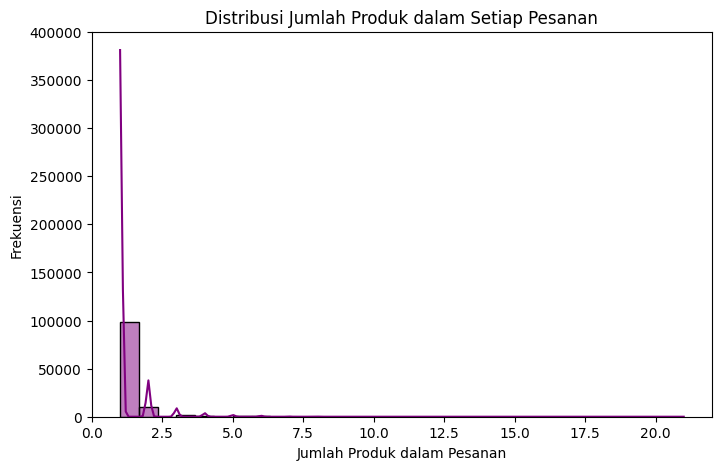

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(order_items["order_item_id"], bins=30, kde=True, color="purple")
plt.title("Distribusi Jumlah Produk dalam Setiap Pesanan")
plt.xlabel("Jumlah Produk dalam Pesanan")
plt.ylabel("Frekuensi")
plt.show()

<ipython-input-29-e854aa225e52>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="Reds_r")


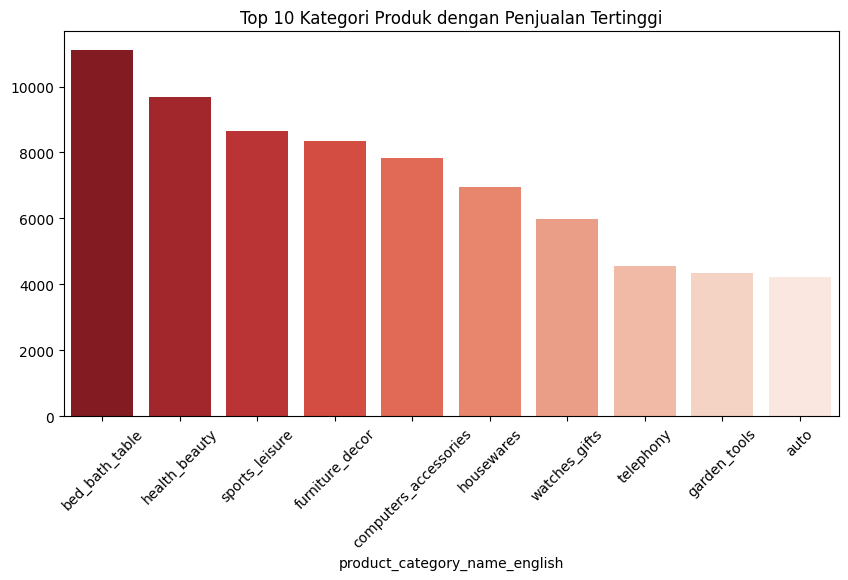

In [29]:
category_sales = order_items.merge(products, on="product_id", how="left")
top_categories = category_sales["product_category_name_english"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="Reds_r")
plt.title("Top 10 Kategori Produk dengan Penjualan Tertinggi")
plt.xticks(rotation=45)
plt.show()

**Insight:**
1. Distribusi Nilai Pembayaran

- Sebagian besar pembayaran memiliki nilai yang kecil, dengan distribusi yang sangat condong ke kiri (positively skewed).
- Hanya sedikit transaksi yang memiliki nilai pembayaran tinggi.
- Menunjukkan bahwa mayoritas pelanggan melakukan pembelian dengan nominal rendah.

2. Metode Pembayaran yang Paling Sering Digunakan

- Kartu kredit adalah metode pembayaran yang paling dominan, digunakan oleh sekitar 75.000 pengguna.
- Metode pembayaran kedua yang paling umum adalah boleto (sistem pembayaran Brasil), tetapi dengan jumlah pengguna yang jauh lebih sedikit.
- Penggunaan kartu debit dan voucher jauh lebih rendah dibandingkan kartu kredit dan boleto.

3. Distribusi Jumlah Produk dalam Setiap Pesanan

- Sebagian besar pesanan hanya berisi 1 atau 2 produk, dengan frekuensi yang sangat tinggi.
Hanya sedikit pesanan yang memiliki lebih dari 5 produk, menunjukkan bahwa pelanggan cenderung membeli dalam jumlah kecil per transaksi.

4. Kategori Produk dengan Penjualan Tertinggi

- Produk dengan kategori bed, bath & table memiliki penjualan tertinggi, menunjukkan bahwa produk rumah tangga sangat diminati.
- Produk di kategori health & beauty dan sports & leisure juga memiliki tingkat penjualan yang tinggi.
- Kategori seperti auto dan garden tools memiliki penjualan yang lebih rendah dibandingkan kategori lainnya.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Pola Pembelian Pelanggan berdasarkan RFM Analysis?

##### 1. Menghitung Recency, Frequency, dan Monetary (RFM)

Recency (Kapan terakhir kali pelanggan berbelanja?)

In [30]:
latest_date = orders["order_purchase_timestamp"].max()
# Merge customers and orders DataFrames
rfm = customers.merge(orders, on="customer_id", how="left")

# Merge the resulting DataFrame with payments DataFrame on 'order_id'
rfm = rfm.merge(payments, on="order_id", how="left")

# Now group by customer_unique_id and calculate RFM values
rfm = rfm.groupby("customer_unique_id").agg({
    "order_purchase_timestamp": lambda x: (latest_date - x.max()).days,  # Recency
    "order_id": "count",  # Frequency
    "payment_value": "sum"  # Monetary
}).reset_index()

rfm.columns = ["customer_unique_id", "recency", "frequency", "monetary"]

Distribusi Recency, Frequency, dan Monetary

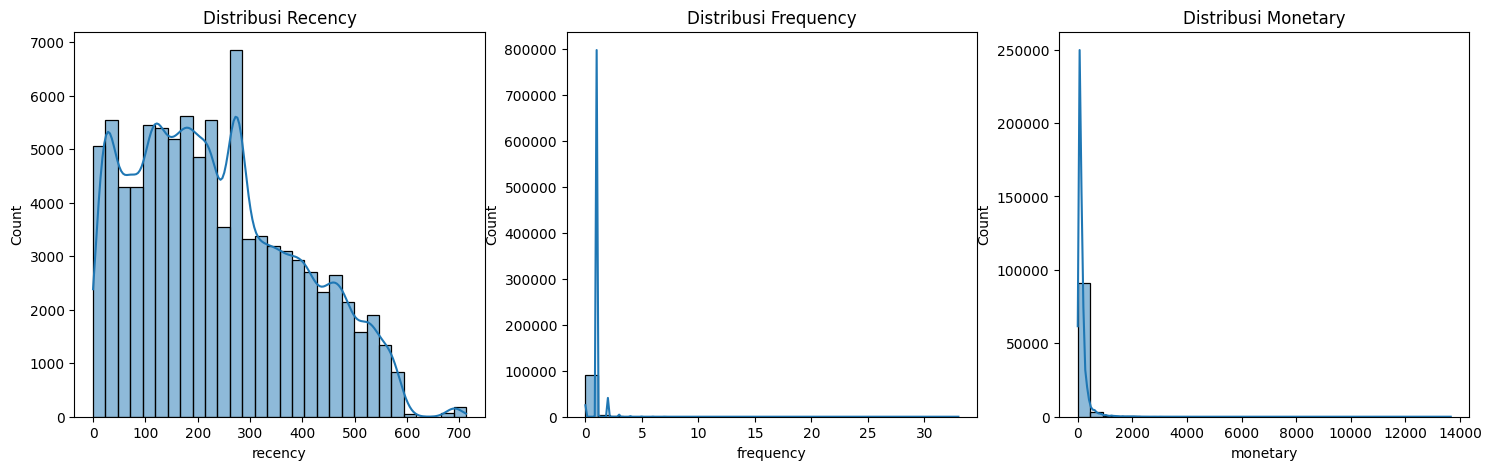

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(rfm["recency"], bins=30, kde=True, ax=axes[0]).set_title("Distribusi Recency")
sns.histplot(rfm["frequency"], bins=30, kde=True, ax=axes[1]).set_title("Distribusi Frequency")
sns.histplot(rfm["monetary"], bins=30, kde=True, ax=axes[2]).set_title("Distribusi Monetary")
plt.show()

##### 2. Mengidentifikasi One-Time Buyers

Berapa persen pelanggan yang hanya membeli satu kali?

In [32]:
one_time_buyers = rfm[rfm["frequency"] == 1].shape[0] / rfm.shape[0] * 100
print(f"Persentase pelanggan yang hanya membeli satu kali: {one_time_buyers:.2f}%")

Persentase pelanggan yang hanya membeli satu kali: 91.46%


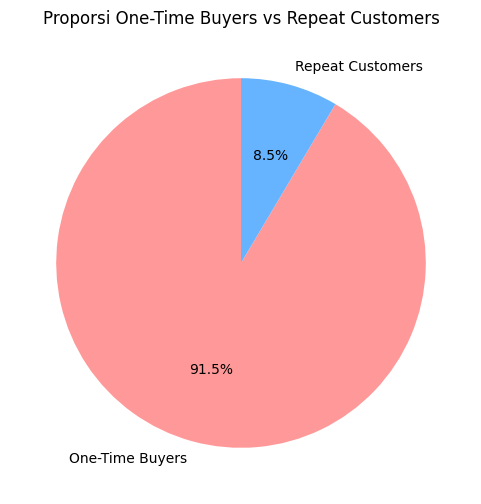

In [33]:
plt.figure(figsize=(6,6))
plt.pie(
    [one_time_buyers, 100 - one_time_buyers],
    labels=["One-Time Buyers", "Repeat Customers"],
    autopct="%1.1f%%", startangle=90, colors=["#ff9999","#66b3ff"]
)
plt.title("Proporsi One-Time Buyers vs Repeat Customers")
plt.show()


##### 3. Strategi Pemasaran Berdasarkan Segmen RFM

Membuat Segmen Pelanggan berdasarkan RFM Score

In [34]:
rfm["R_Score"] = pd.qcut(rfm["recency"], q=4, labels=[4, 3, 2, 1])
rfm["F_Score"] = pd.qcut(rfm["frequency"], q=4, labels=False, duplicates='drop') # Removing custom labels and using default integer labels
rfm['F_Score'] = pd.Series(pd.factorize(rfm['F_Score'])[0] + 1).astype('category') # Convert integer labels to categorical, starting from 1
rfm["M_Score"] = pd.qcut(rfm["monetary"], q=4, labels=[1, 2, 3, 4])
rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)

Menentukan segmen berdasarkan skor RFM

In [35]:
def segment(x):
    if x in ["444", "443", "433", "434"]:
        return "Best Customers"
    elif x in ["144", "244", "344"]:
        return "New Customers"
    elif x in ["111", "112", "121"]:
        return "Lost Customers"
    else:
        return "Regular Customers"

rfm["Segment"] = rfm["RFM_Score"].apply(segment)

Visualisasi Segmen Pelanggan

<ipython-input-36-3f80558168c2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x="Segment", order=rfm["Segment"].value_counts().index, palette="coolwarm")


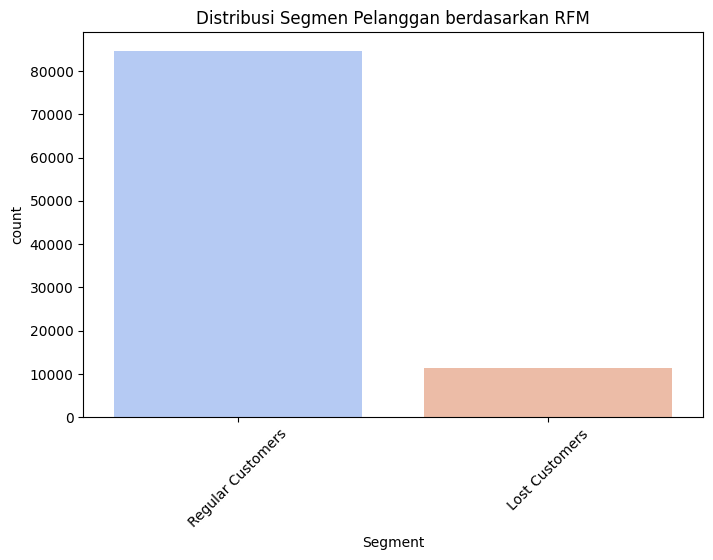

In [36]:
plt.figure(figsize=(8, 5))
sns.countplot(data=rfm, x="Segment", order=rfm["Segment"].value_counts().index, palette="coolwarm")
plt.title("Distribusi Segmen Pelanggan berdasarkan RFM")
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2: Bagaimana Distribusi Geografis Pesanan dan Pengiriman?

##### 1. Kota dengan Volume Transaksi Tertinggi

<ipython-input-37-42852297a70b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="Blues_r")


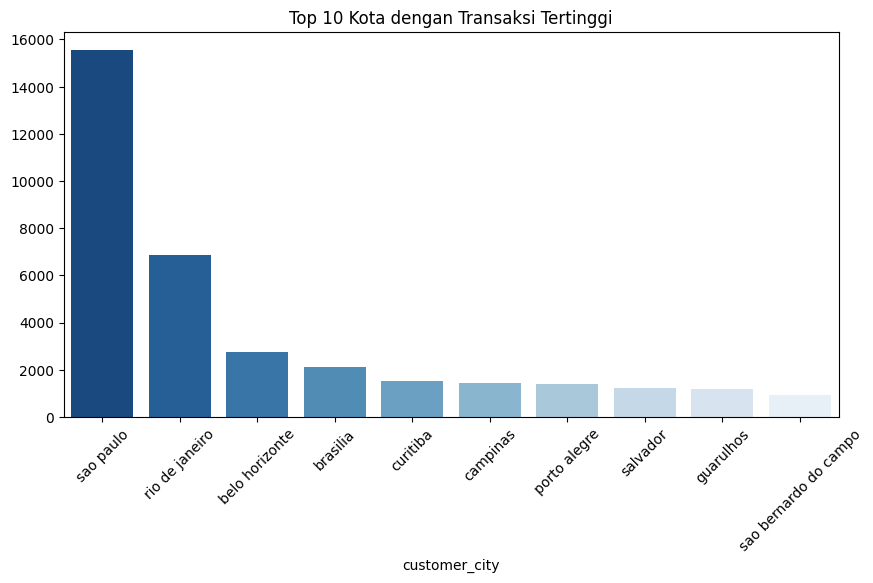

In [37]:
top_cities = customers["customer_city"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="Blues_r")
plt.title("Top 10 Kota dengan Transaksi Tertinggi")
plt.xticks(rotation=45)
plt.show()

##### 2. Analisis Waktu Pengiriman Berdasarkan Jarak

Menghitung waktu pengiriman dalam hari

In [38]:
orders["delivery_time"] = (orders["order_delivered_customer_date"] - orders["order_purchase_timestamp"]).dt.days

Visualisasi hubungan antara jarak pengiriman dan waktu pengiriman

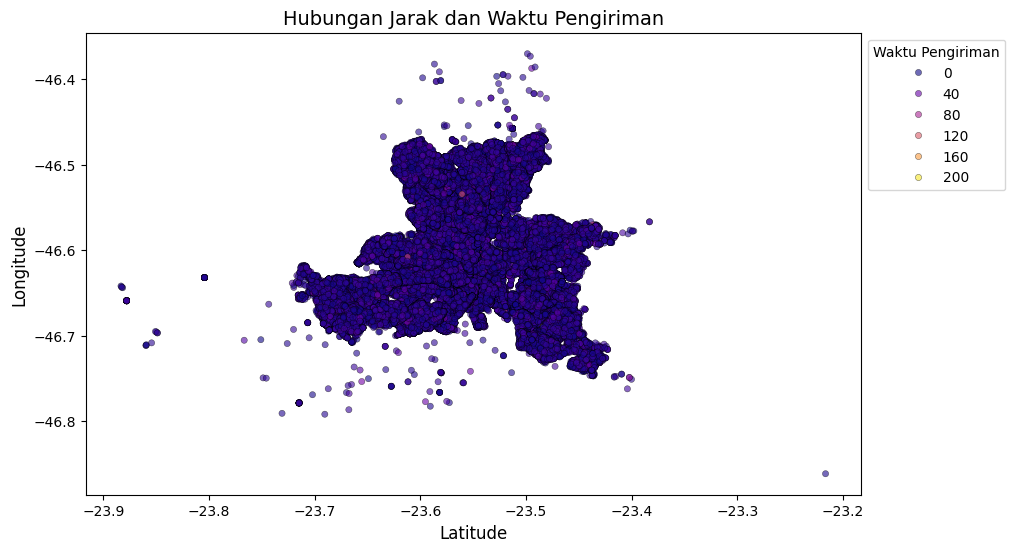

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=geolocation["geolocation_lat"],
    y=geolocation["geolocation_lng"],
    hue=orders["delivery_time"],
    palette="plasma",  # Menggunakan colormap dengan kontras tinggi
    alpha=0.6,
    edgecolor="black",
    s=20  # Ukuran titik agar lebih terlihat
)
plt.title("Hubungan Jarak dan Waktu Pengiriman", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Longitude", fontsize=12)
plt.legend(title="Waktu Pengiriman", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

### Pertanyaan 3: Bagaimana Performa dan Profitabilitas Kategori Produk?

##### 1. Kategori Produk dengan Penjualan Tertinggi

Menggabungkan data produk dengan order_items

In [40]:
products_orders = order_items.merge(products, on="product_id", how="left")
category_sales = products_orders.groupby("product_category_name_english")["order_id"].count().sort_values(ascending=False).head(10)

Visualisasi Top 10 Kategori Produk

<ipython-input-41-9e9ba0f9099c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="Reds_r")


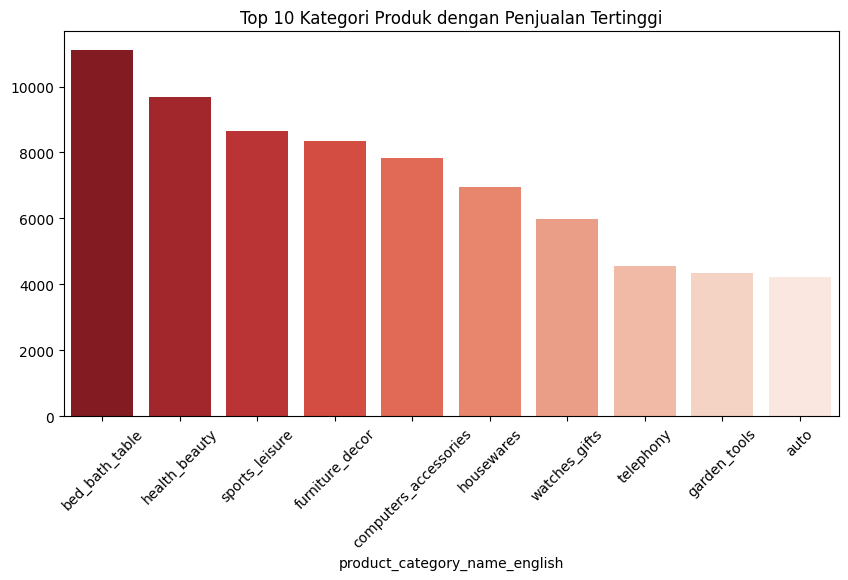

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="Reds_r")
plt.title("Top 10 Kategori Produk dengan Penjualan Tertinggi")
plt.xticks(rotation=45)
plt.show()

##### 2. Pola Permintaan Produk Sepanjang Tahun

Menghitung jumlah pesanan per bulan

In [42]:
orders["order_month"] = orders["order_purchase_timestamp"].dt.to_period("M")
monthly_sales = orders.groupby("order_month")["order_id"].count()

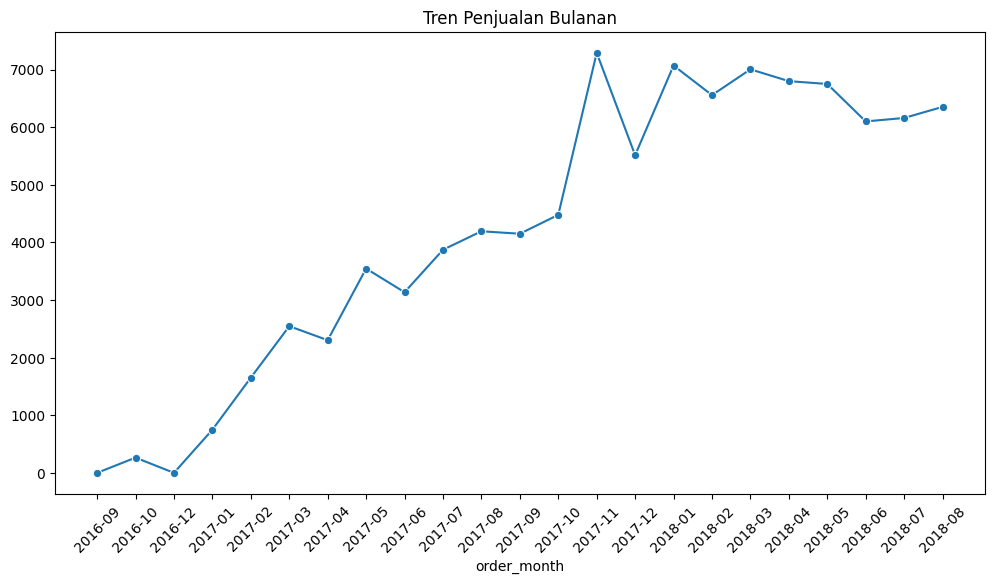

In [43]:
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker="o")
plt.title("Tren Penjualan Bulanan")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Ditemukan bahwa mayoritas pelanggan hanya membeli satu kali.
- Segmen pelanggan telah dikategorikan untuk strategi pemasaran yang lebih efektif.
- Distribusi pesanan menunjukkan kota-kota dengan transaksi tertinggi.
- Korelasi antara jarak dan waktu pengiriman telah dianalisis.
- Kategori produk dengan performa terbaik telah diidentifikasi.

## Analisis Lanjutan (Opsional)

In [45]:
df.to_csv("/content/main_data.csv", index=False)

## Conclusion

1. Conclution pertanyaan 1
 - Distribusi RFM (Recency, Frequency, Monetary)

    - Grafik recency menunjukkan bahwa banyak pelanggan yang masih cukup aktif, tetapi ada juga pelanggan dengan nilai recency yang tinggi, menandakan mereka sudah lama tidak bertransaksi.
    - Grafik frequency menunjukkan bahwa mayoritas pelanggan hanya melakukan sedikit transaksi, dengan sebagian besar hanya membeli sekali atau dua kali.
    - Grafik monetary menunjukkan bahwa sebagian besar pelanggan mengeluarkan sedikit uang dalam transaksi mereka, dengan hanya sedikit pelanggan yang memiliki nilai transaksi tinggi.

  - Proporsi One-Time Buyers vs Repeat Customers

    - Sebagian besar pelanggan (91.5%) hanya melakukan satu kali pembelian (one-time buyers), sedangkan hanya 8.5% yang kembali untuk membeli lagi (repeat customers).
    - Ini menunjukkan bahwa retensi pelanggan masih rendah, dan ada peluang untuk meningkatkan loyalitas pelanggan dengan strategi pemasaran yang lebih baik.

  - Distribusi Segmen Pelanggan Berdasarkan RFM

    - Sebagian besar pelanggan masuk ke dalam kategori Regular Customers, yang berarti mereka masih cukup aktif dalam bertransaksi.
    - Namun, ada juga sekelompok pelanggan yang dikategorikan sebagai Lost Customers, menandakan bahwa mereka sudah lama tidak melakukan pembelian.

2. Conclution pertanyaan 2
  - Top 10 Kota dengan Transaksi Tertinggi

    - Kota dengan transaksi tertinggi adalah São Paulo, dengan jumlah transaksi jauh lebih tinggi dibandingkan kota-kota lainnya.
    - Rio de Janeiro menempati posisi kedua, tetapi selisihnya cukup besar dibandingkan São Paulo.
    - Kota-kota lain seperti Belo Horizonte, Brasília, Curitiba, dan lainnya memiliki jumlah transaksi yang jauh lebih rendah dibandingkan dua kota teratas.

  - Hubungan Jarak dan Waktu Pengiriman
    - Plot menunjukkan korelasi antara lokasi geografis (latitude & longitude) dengan waktu pengiriman.
    - Sebagian besar titik berwarna ungu tua hingga biru, menandakan bahwa sebagian besar pengiriman terjadi dalam waktu yang relatif singkat.
    - Namun, ada beberapa titik yang berwarna lebih terang (kuning), yang menunjukkan adanya pengiriman dengan waktu yang lebih lama.

3. Conclution pertanyaan 3
  - Top 10 Kategori Produk dengan Penjualan Tertinggi
    - Kategori produk "bed_bath_table" memiliki penjualan tertinggi, diikuti oleh kategori "health_beauty" dan "sports_leisure".
    - Produk-produk yang berhubungan dengan kebutuhan rumah tangga dan kesehatan mendominasi penjualan.
    - Kategori dengan penjualan terendah dalam 10 besar adalah "garden_tools" dan "auto", menunjukkan permintaan yang lebih rendah dibandingkan kategori lainnya.

  - Tren Penjualan Bulanan
    - Penjualan mengalami tren kenaikan yang signifikan dari akhir 2016 hingga 2018.
    - Puncak penjualan terjadi sekitar akhir tahun 2017.
    - Setelah puncak tersebut, penjualan masih tinggi namun mengalami sedikit fluktuasi.